#Tahap1: Rumusan Masalah


1.   Negara bagian (state) dan kota mana yang memiliki konsentrasi pelanggan tertinggi?
2.   Berapa banyak pelanggan yang melakukan pembelian lebih dari satu kali (Repeat Order) dan kota mana yang memiliki repeat buyers terbanyak?
3.   Apakah pelanggan di negara bagian tertentu cenderung memberikan skor review yang lebih rendah karena durasi pengiriman yang lama?




#Tahap 2: Data Wrangling, CLeaning dan Merging

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Menggunakan tabel inti
Tabel-tabel utama yang digunakan untuk proyek ini adalah:
*   customers_dataset.csv
*   orders_dataset.csv'
*   order_items_dataset.csv
*   products_dataset.csv'
*   product_category_name_translation.csv
*   order_payments_dataset.csv





###Data Wragling customers_dataset.csv

In [2]:
customers = pd.read_csv('customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [5]:
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].astype(str).str.zfill(5)

In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
# Mapping singkatan ke nama lengkap Negara Bagian Brazil
state_map = {
'AC': 'Acre', 'AL': 'Alagoas', 'AM': 'Amazonas', 'AP': 'Amapá',
    'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo',
    'GO': 'Goiás', 'MA': 'Maranhão', 'MG': 'Minas Gerais', 'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso', 'PA': 'Pará', 'PB': 'Paraíba', 'PE': 'Pernambuco',
    'PI': 'Piauí', 'PR': 'Paraná', 'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte',
    'RO': 'Rondônia', 'RR': 'Roraima', 'RS': 'Rio Grande do Sul', 'SC': 'Santa Catarina',
    'SE': 'Sergipe', 'SP': 'São Paulo', 'TO': 'Tocantins'
}

# Terapkan ke hasil EDA kamu (misal nama dataframe-nya bst_state_df)
customers['state_name'] = customers['customer_state'].map(state_map)

###Data Wragling orders_dataset.csv

In [8]:
orders = pd.read_csv('orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [11]:
#mengubah tipe kolom menjadi timestamp
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    orders[column] = pd.to_datetime(orders[column])

In [12]:
# Melihat apakah data yang kosong itu karena pesanannya dibatalkan (canceled)
orders[orders['order_delivered_customer_date'].isna()]['order_status'].value_counts()

,count
order_status,
shipped,1107
canceled,619
unavailable,609
invoiced,314
processing,301
delivered,8
created,5
approved,2


In [13]:
orders["delivery_time"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

In [14]:
print(orders["delivery_time"].describe())

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  96476 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


###Data Wragling order_items_dataset.csv

In [16]:
items = pd.read_csv('order_items_dataset.csv')
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [19]:
#mengubah tipe kolom menjadi timestamp
items["shipping_limit_date"] = pd.to_datetime(items["shipping_limit_date"])

###Data Wragling products_dataset.csv

In [20]:
products = pd.read_csv('products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


###Data Wragling product_category_name_translation.csv

In [23]:
category_translation = pd.read_csv('product_category_name_translation.csv')
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [24]:
category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


###Data Wragling order_payments_dataset.csv

In [25]:
payments = pd.read_csv('order_payments_dataset.csv')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


###Data Wragling order_reviews_dataset.csv

In [27]:
reviews = pd.read_csv('order_reviews_dataset.csv')
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [28]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [30]:
#mengubah tipe kolom menjadi timestamp
reviews["review_answer_timestamp"] = pd.to_datetime(reviews["review_answer_timestamp"])

###Data Merging

In [31]:
main_df = pd.merge(orders, customers, on="customer_id", how="left")

main_df = pd.merge(main_df, items, on="order_id", how="left")

main_df = pd.merge(main_df, reviews, on="order_id", how="left")

main_df = pd.merge(main_df, products, on="product_id", how="left")
main_df = pd.merge(main_df, category_translation, on="product_category_name", how="left")

In [32]:
main_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,af07308b275d755c9edb36a90c618231,...,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,...,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,2018-02-18 13:02:51,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [33]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   customer_id                    114092 non-null  object        
 2   order_status                   114092 non-null  object        
 3   order_purchase_timestamp       114092 non-null  datetime64[ns]
 4   order_approved_at              113930 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112112 non-null  datetime64[ns]
 6   order_delivered_customer_date  110839 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114092 non-null  datetime64[ns]
 8   delivery_time                  110839 non-null  float64       
 9   customer_unique_id             114092 non-null  object        
 10  customer_zip_code_prefix       114092 non-null  object        
 11  

#Tahap 3: Exploratory Data Analysis (EDA)

Pertanyaaan 1:
"Negara bagian (state) dan kota mana yang memiliki konsentrasi pelanggan tertinggi?"
(Untuk mengetahui lokasi pelanggan, agar perusahaan bisa mengoptimalkan biaya logistik dan menentukan lokasi gudang baru.)

In [34]:
sales_state = main_df.groupby('state_name')['customer_id'].nunique().sort_values(ascending=False)
sales_state

,customer_id
state_name,
São Paulo,41746
Rio de Janeiro,12852
Minas Gerais,11635
Rio Grande do Sul,5466
Paraná,5045
Santa Catarina,3637
Bahia,3380
Distrito Federal,2140
Espírito Santo,2033


In [35]:
top5 = sales_state.nlargest(5, 'all')

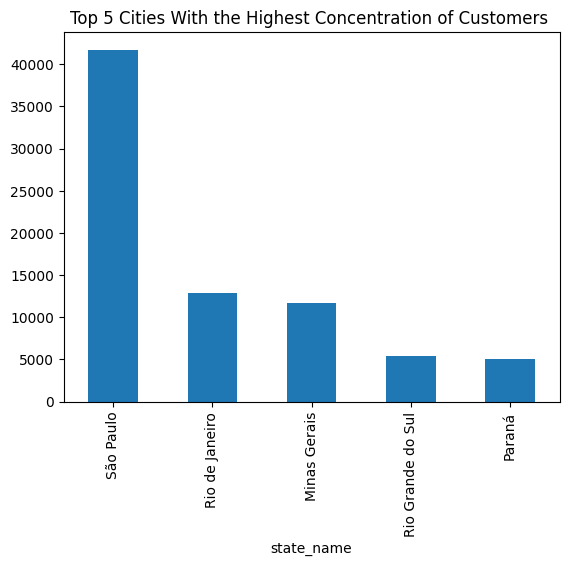

In [36]:
top5.plot.bar(x='Category', y='Values', title='Top 5 Cities With the Highest Concentration of Customers ')
plt.show()

Berdasarkan visualisasi data diatas, kota yang memiliki adalah Sao Paulo sebnyak 41746 pelanggan diikuti dengan kota Rio de Janeiro sebanyak 12852 pelanggan.

Pertanyaan 2:
Berapa banyak pelanggan yang melakukan pembelian lebih dari satu kali (Repeat Order) dankota mana yang memiliki repeat buyers terbanyak?

In [37]:
# Menghitung jumlah pesanan per pelanggan unik
user_order_counts = main_df.groupby('customer_unique_id').agg({
    'order_id': 'nunique'
}).reset_index()

user_order_counts.columns = ['customer_unique_id', 'order_count']

# Mengelompokkan menjadi dua kategori
one_time_buyers = user_order_counts[user_order_counts['order_count'] == 1].shape[0]
repeat_buyers = user_order_counts[user_order_counts['order_count'] > 1].shape[0]

In [38]:
sizes = repeat_buyers, one_time_buyers
labels = 'reprat buyer', 'one time buyer'
explode = (0, 0.1)

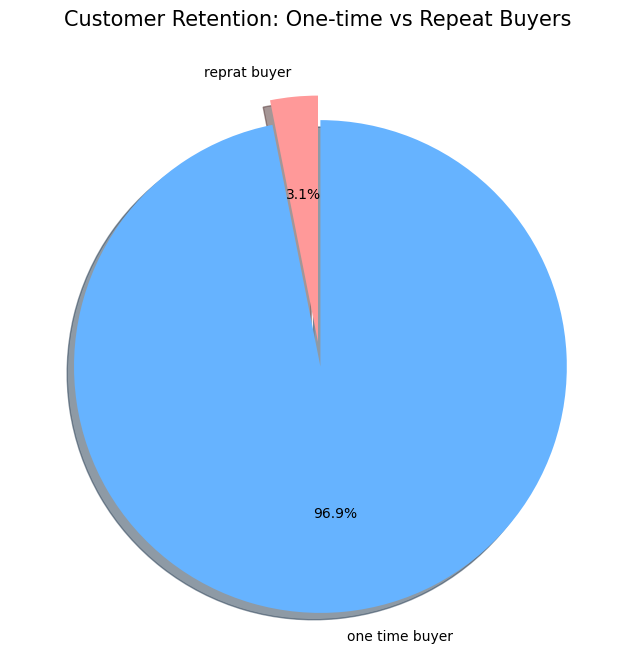

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff'],
    shadow=True
)

ax.set_title("Customer Retention: One-time vs Repeat Buyers", fontsize=15)
plt.show()

Berdasarkan grafik pie chart datas, persentase repeat buyer hanya sebesar 3,1% dari total pembeli,inimeunjukkan bahwa lebih banyak pembeli yang hanyamelakukan satu kali pembelian di E-commerce.

In [40]:
# 1. Hitung jumlah pesanan per pelanggan unik dan sertakan kolom kota
customer_orders_city = main_df.groupby(['customer_unique_id', 'customer_city']).agg({
    'order_id': 'nunique'
}).reset_index()

customer_orders_city.columns = ['customer_unique_id', 'city', 'order_count']

# 2. Filter hanya pelanggan yang melakukan Repeat Order (order_count > 1)
repeat_buyers_city = customer_orders_city[customer_orders_city['order_count'] > 1]

# 3. Hitung jumlah Repeat Buyers per kota
top_repeat_cities = repeat_buyers_city.groupby('city').size().reset_index(name='repeat_buyer_count')

# 4. Urutkan dan ambil 10 besar
top_repeat_cities = top_repeat_cities.sort_values('repeat_buyer_count', ascending=False).head(10)

/tmp/ipython-input-1530386595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


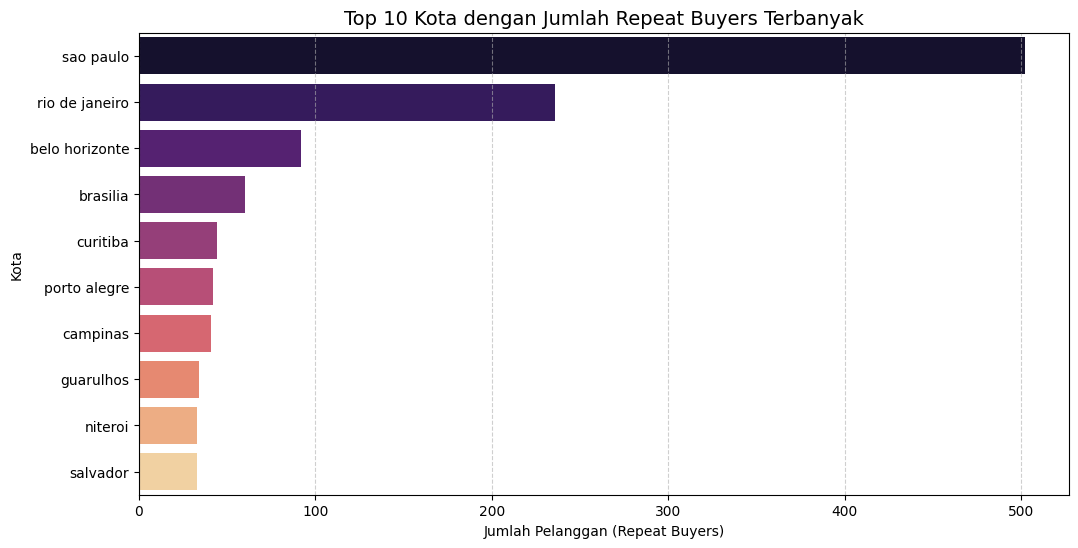

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_repeat_cities,
    x='repeat_buyer_count',
    y='city',
    palette='magma'
)

plt.title('Top 10 Kota dengan Jumlah Repeat Buyers Terbanyak', fontsize=14)
plt.xlabel('Jumlah Pelanggan (Repeat Buyers)')
plt.ylabel('Kota')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

berdasarkan barchart diatas, Sao Paulo menjadi kota dengan repeat buyer terbanyak, diikiuti degan kota Rio de Janeiro.

Pertanyaan 3:
Apakah pelanggan di negara bagian tertentu cenderung memberikan skor review yang lebih rendah karena durasi pengiriman yang lama?

In [42]:
reviews = pd.read_csv('order_reviews_dataset.csv')

delivery_analysis_df = pd.merge(orders, customers, on="customer_id", how="inner")
delivery_analysis_df = pd.merge(delivery_analysis_df, reviews, on="order_id", how="inner")

delivery_analysis_df = delivery_analysis_df[
    (delivery_analysis_df['order_status'] == 'delivered') &
    (delivery_analysis_df['delivery_time'] >= 0)
]

In [43]:
state_performance_df = delivery_analysis_df.groupby('customer_state').agg({
    'delivery_time': 'mean',
    'review_score': 'mean',
    'customer_id': 'count'
}).reset_index()

state_performance_df.columns = ['state', 'avg_delivery_time', 'avg_review_score', 'total_orders']
state_performance_df['state_name'] = state_performance_df['state'].map(state_map)

In [44]:
# Mengurutkan data berdasarkan waktu pengiriman
sorted_df = state_performance_df.sort_values('avg_delivery_time').reset_index(drop=True)

# Mengambil 5 teratas (tercepat) dan 5 terbawah (terlambat)
extreme_states = pd.concat([sorted_df.head(5), sorted_df.tail(5)])

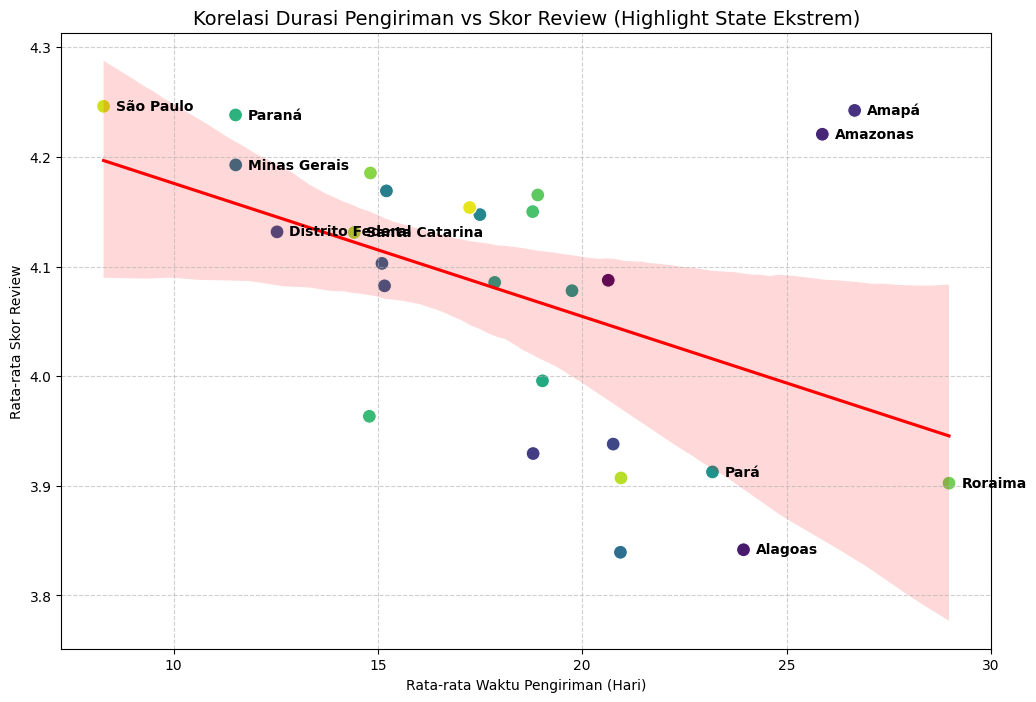

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot semua titik (Scatter)
sns.scatterplot(
    data=state_performance_df,
    x='avg_delivery_time',
    y='avg_review_score',
    hue='state_name',
    s=100,
    palette='viridis',
    legend=False
)


sns.regplot(
    data=state_performance_df,
    x='avg_delivery_time',
    y='avg_review_score',
    scatter=False,
    color='red',
    label='Trend Line'
)


for i, row in extreme_states.iterrows():
    plt.text(
        row['avg_delivery_time'] + 0.3,
        row['avg_review_score'],
        row['state_name'],
        fontsize=10,
        weight='bold',
        va='center'
    )

plt.title('Korelasi Durasi Pengiriman vs Skor Review (Highlight State Ekstrem)', fontsize=14)
plt.xlabel('Rata-rata Waktu Pengiriman (Hari)')
plt.ylabel('Rata-rata Skor Review')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Berdasarkan grafik korelasi diatas, secara umum semakin lama waktu pengiriman maka semakin kecil pula score review yang diberikan pelanggan. Sao Paulo menjadi kota dengan rata-rata waktu pengiriman tercepat dan rata-rata score review tertinggi. Jika kita melihat jawaban pertanyaan pertama dimana Sao Paulo menjadi kota dengan jumlah pelanggan terbanyak, hipotesisnya adalah karena waktu pengiriman ke Sao Paulo relatif cepat sehingga pelanggan disana merasa puas yang dibuktikan dengan pemberian score review tinggi.

#Tahap 4: Conclusion

Berdasarkan EDA yang telah dilakukan sebelumnya, dapat ditarik kesimpulan bahwa kecepatan pengiriman menjadi salah satu hal yang dapat mempengaruhi kepuasan dan loyalitas pelanggan.
Beberapa rekomendasi action plan adalah:
*   Logistik: Meningkatkan efisiensi pengiriman ke wilayah luar São Paulo untuk menjaga skor review tetap tinggi.
*   Marketing: Menginisiasi program loyalitas/CRM untuk meningkatkan angka repeat purchase yang saat ini masih rendah.